# Data Visualization

In [52]:
import os
import pandas as pd
import matplotlib.pyplot as plt

DIR_DATA = os.path.join("..", "data")
PATH_DATA_TRAIN = os.path.join(DIR_DATA, "train.csv")

NO_DISASTER_COLOR = "darkred"
DISASTER_COLOR = "teal"

df_train = pd.read_csv(PATH_DATA_TRAIN)

## Class Imbalance

Positive class instances = tweets predicting disaster

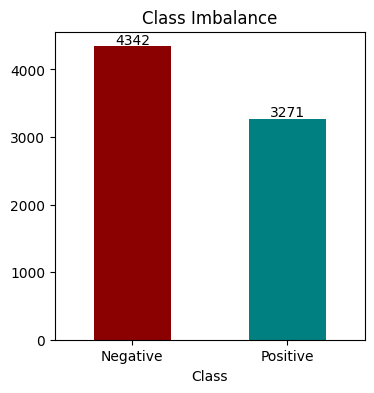

Negative instances: 57.03%
Positive instances: 42.97%


In [71]:
class_distribution = df_train['target'].value_counts()

plt.figure(figsize=(4, 4))
ax = class_distribution.plot(kind='bar', title='Class Imbalance', color=[NO_DISASTER_COLOR, DISASTER_COLOR])
plt.xlabel('Class')
plt.xticks([0, 1], ['Negative', 'Positive'], rotation='horizontal')

fig = plt.gcf()

# Add a label with the bar height (frequency)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 30, '{}'.format(height), ha='center')

plt.show()

# Normalized class distribution values
class_distribution_normalized = class_distribution / class_distribution.sum()
print(f"Negative instances: {class_distribution_normalized[0]*100:.4}%")
print(f"Positive instances: {class_distribution_normalized[1]*100:.4}%")


## Class Distribution

Is there a relationship between tweet length and disaster prediction?

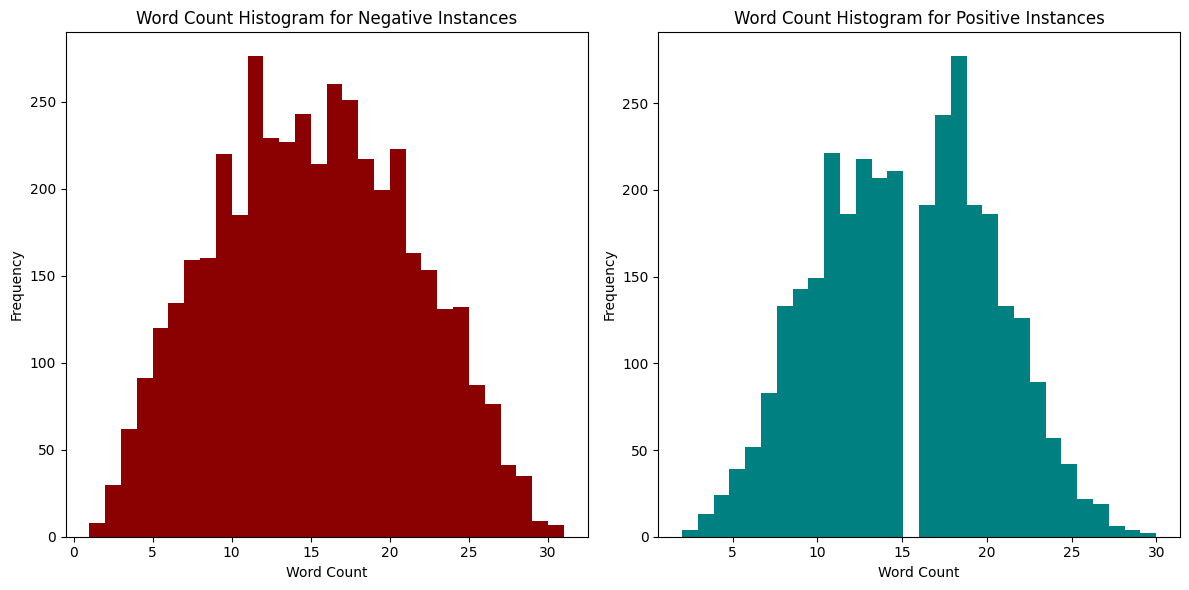

In [57]:
def word_count_histogram(target: int, color: str, class_name: str):
    df_train[df_train['target'] == target]['word_count'].plot(kind='hist', color=color, bins=30)
    plt.title(f'Word Count Histogram for {class_name} Instances')
    plt.xlabel('Word Count')

# Add new column for word count
df_train['word_count'] = df_train['text'].apply(lambda x: len(str(x).split()))

# Plot histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
word_count_histogram(0, NO_DISASTER_COLOR, "Negative")

plt.subplot(1, 2, 2)
word_count_histogram(1, DISASTER_COLOR, "Positive")

plt.tight_layout()
plt.show()